The goal of this project is to predict whether an individual suffers from cardiovascular heart disease using some predictors and to find the main risk factors for a cardiovascular heart disease. This information helps to improve preventive medical checkups and to react quicker in emergencies.

Goal: Predict whether a patient should be diagnosed with Heart Disease.

1 = patient diagnosed with Heart Disease
0 = patient not diagnosed with Heart Disease


In [1]:
pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 40.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

### Utility
import math
import warnings
import string

### Plotting
# Matplotlib
import matplotlib.pyplot as plt
# Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

#Tree
#from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Seaborn
import seaborn as sns

import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

warnings.filterwarnings("ignore")

Colab environment detected.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df= pd.read_csv("/content/drive/MyDrive/BDA Data/cardio.csv",delimiter=';')

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Pre-processing and EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
num_missing_values = df.isna().sum().sum()
num_missing_values

0

In [8]:
#dropping ID columns
df.drop(['id'], axis=1,inplace=True)

In [9]:
duplicate_sum = df.duplicated().sum()
duplicate_sum

24

In [10]:
# dropping the duplicates
df.drop_duplicates(keep = 'first', inplace = True)

In [11]:
#replacing Gender with 1 and 0
df['gender']=df['gender'].replace({1:0,2:1})

<Axes: >

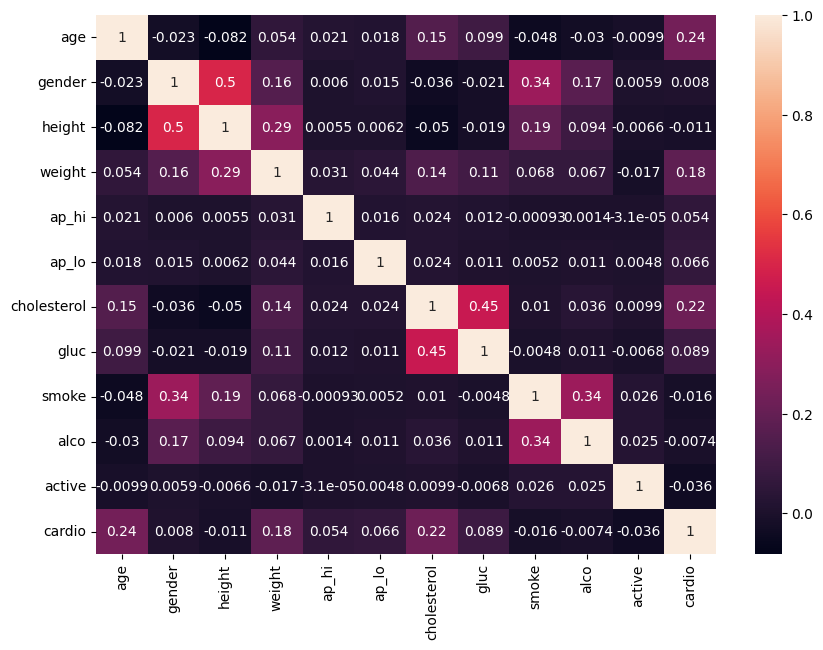

In [12]:
# check correlations
plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

From the above heatmap, we see that no features directly correlate with the label (cardio) and that generally, there do not exist significant correlations between other variables. However, correlations exist between a select few variables:

- Height and gender are correlated with a score of 0.5.
- Glucose and cholesterol are correlated with a score of 0.45.
- Smoking habits and gender are correlated with a score of 0.34.

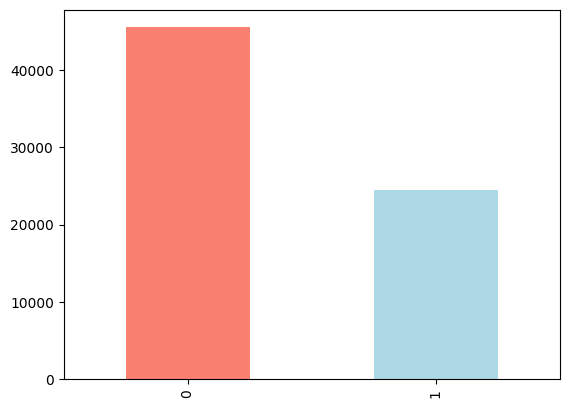

In [13]:
# Get the count of each gender
#1:female ,0: male
gender_count = df['gender'].value_counts()
df.gender.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

gender
0    161.354347
1    169.948134
Name: height, dtype: float64


<Axes: xlabel='gender'>

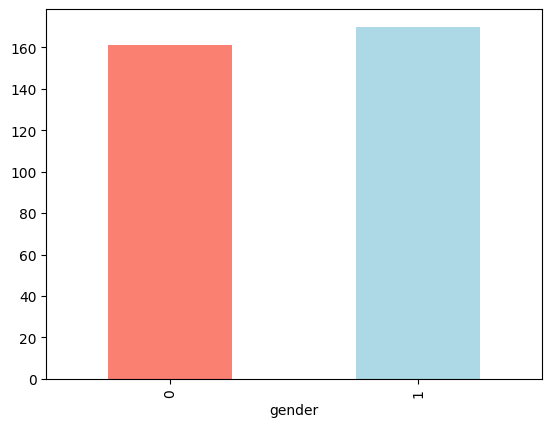

In [14]:
# Get the height of each gender
avg_height = df.groupby('gender')['height'].mean()
print(avg_height)
avg_height.plot(kind="bar", color=["salmon", "lightblue"])


gender
0    1161
1    2603
Name: alco, dtype: int64


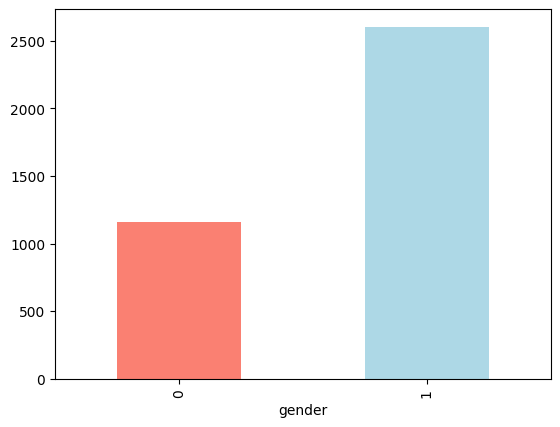

In [15]:
alcohol=df.groupby('gender')['alco'].sum()
print(alcohol)
ax=alcohol.plot(kind="bar", color=["salmon", "lightblue"])


In [16]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,0.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#Observations


- 'Age' column has to be recalculated as the min and max values are unrealistic .
- 'Weight' column have unrealistic min/max values.
- Systolic blood pressure "ap_hi" and Diastolic blood pressure "ap_lo" cannot be negative
- If ap_hi and ap_lo are more than 180 and 120 mmHg respectively then it is an hypertensive crisis, which is an emergency case. Therefore max values are not realistic.

#Check Outliers

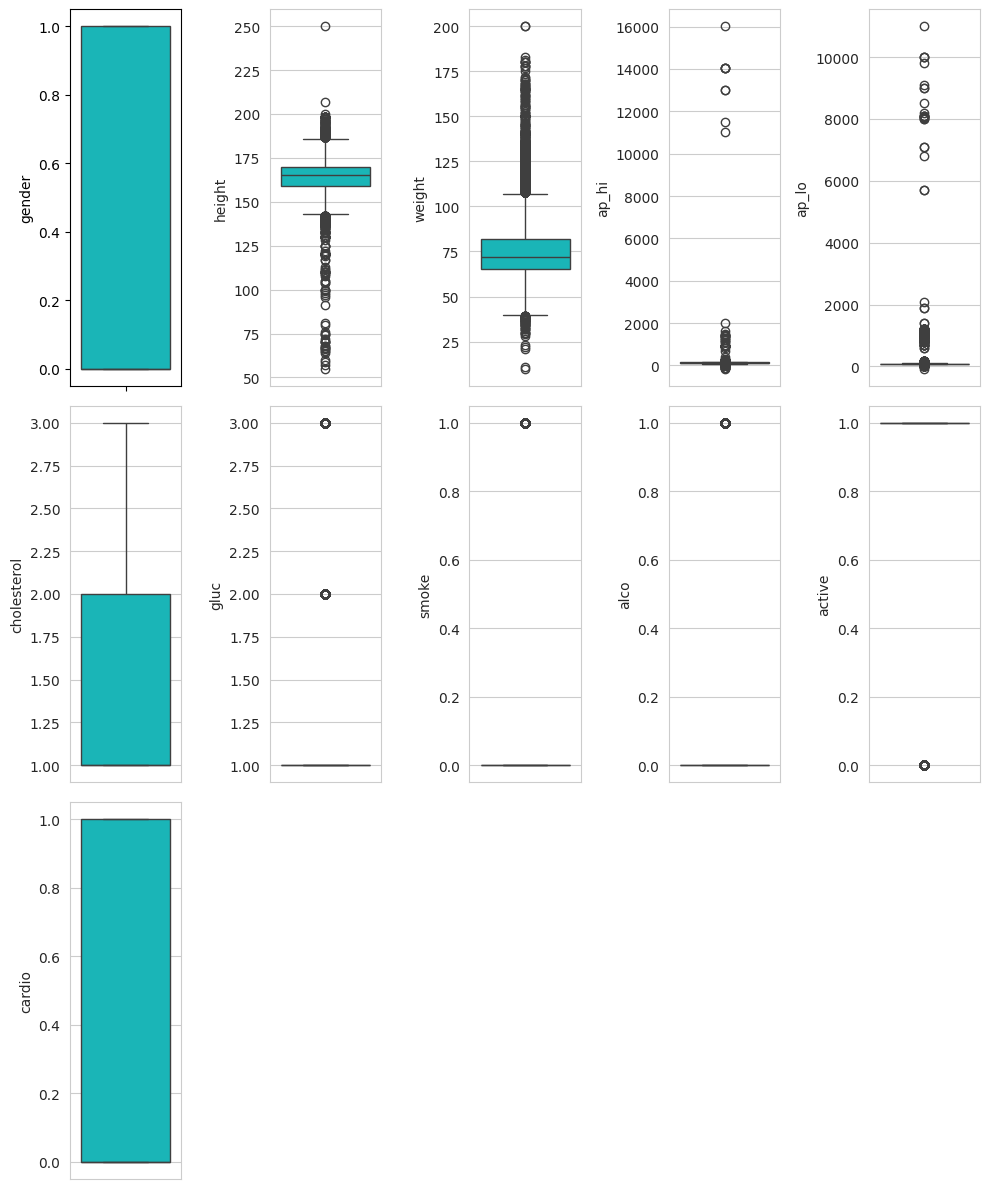

In [17]:
# Plotting outliers
def check_outliers(df):

    l = df.columns.values

    number_of_columns=(len(l)-1)//2
    number_of_rows = 3

    plt.figure(figsize=(2*number_of_columns,4*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows ,number_of_columns,i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v',color = 'darkturquoise' )
        plt.tight_layout()

check_outliers(df)

Observarions

- we can observe that there are a lot of outliers in height and weight columns

- Similarly ap_hi and ap_lo also also have some outliers

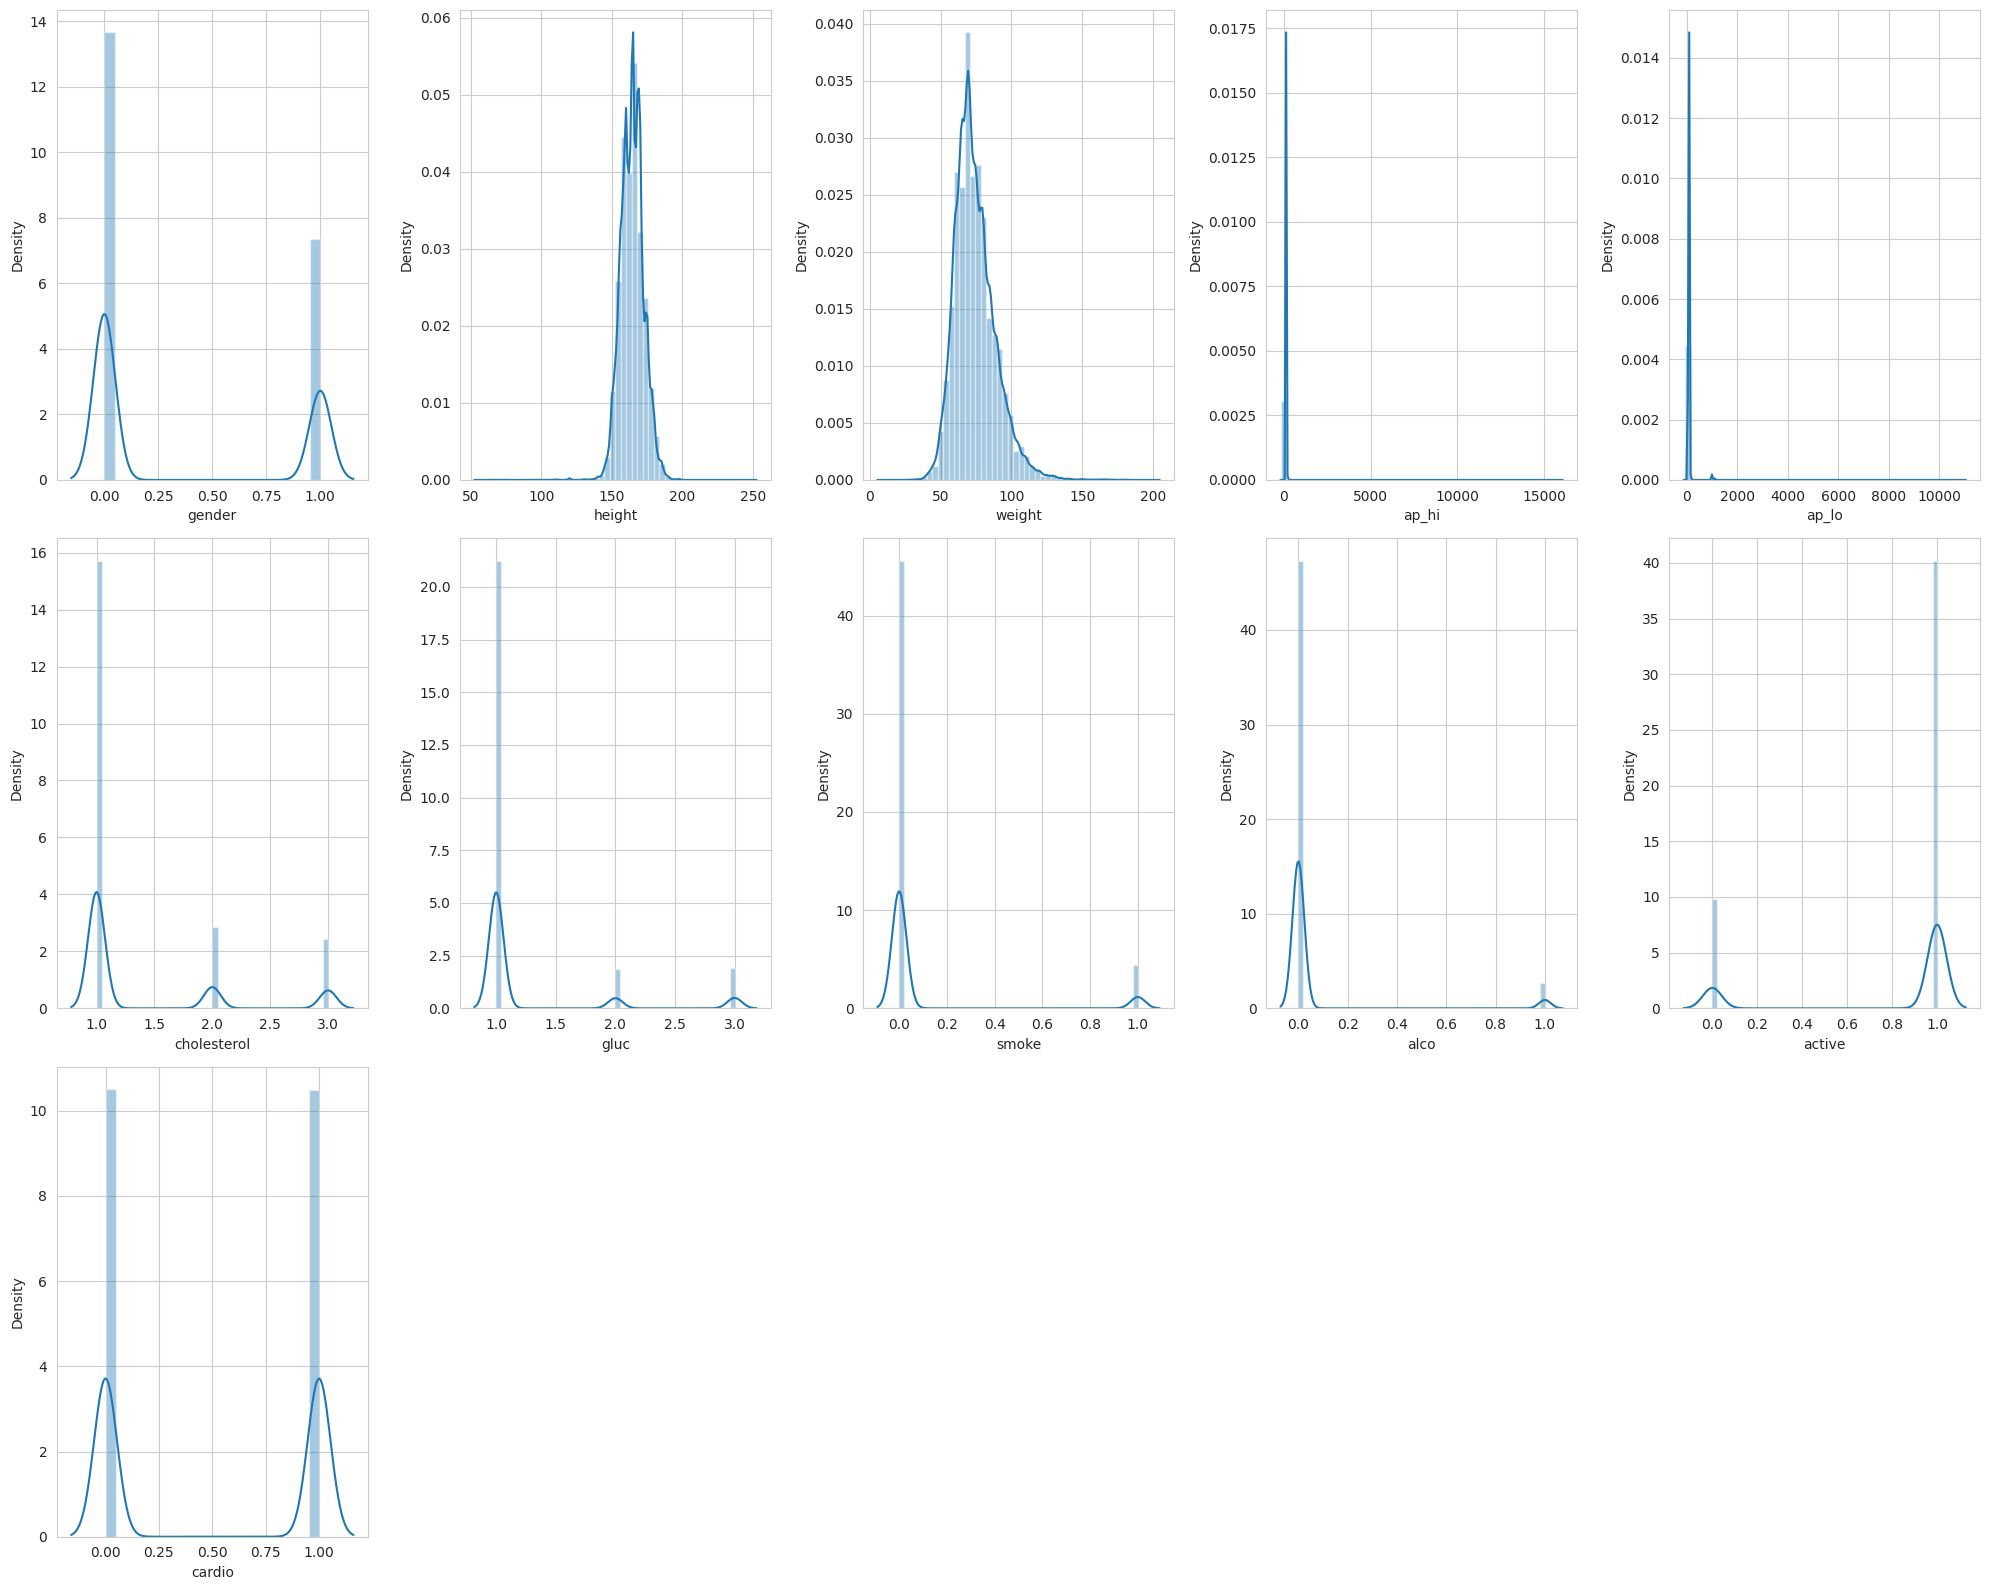

In [18]:
# check distribution and skew
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)//2
    number_of_rows = 2

    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.distplot(df[l[i]],kde=True)
        plt.tight_layout()


check_dist(df)

Observations:

- As you can see that the columns are well normally distributed except weight, ap_hi and ap_lo
- ap_hi and ap_lo is highly right skewed
- weight seems right skewed and height seems slightly left skewed

In [19]:
print("Records having inaccurate systollic and distollic blood pressures", len(df[ (df['ap_lo'] >= 120) & (df['ap_hi'] <=180) ] ))
print("Records having systollic higher than diastolic ",len( df[ (df['ap_lo'] > df['ap_hi']) ] ))
print("Records having negative values for bloodpressure",len(df[(df['ap_lo'] < 0) | (df['ap_hi'] <0)]))

Records having inaccurate systollic and distollic blood pressures 1143
Records having systollic higher than diastolic  1234
Records having negative values for bloodpressure 8


In [20]:
df = df[ (df['ap_lo'] >= 0) | (df['ap_hi'] >= 0) ]  #considering positive values remove negative values
df = df[ (df['ap_lo'] <= 120) & (df['ap_hi'] <= 180) ]  #remove fishy data points
df = df[ (df['ap_lo'] < df['ap_hi']) ]  #considering systolic less than diastolic

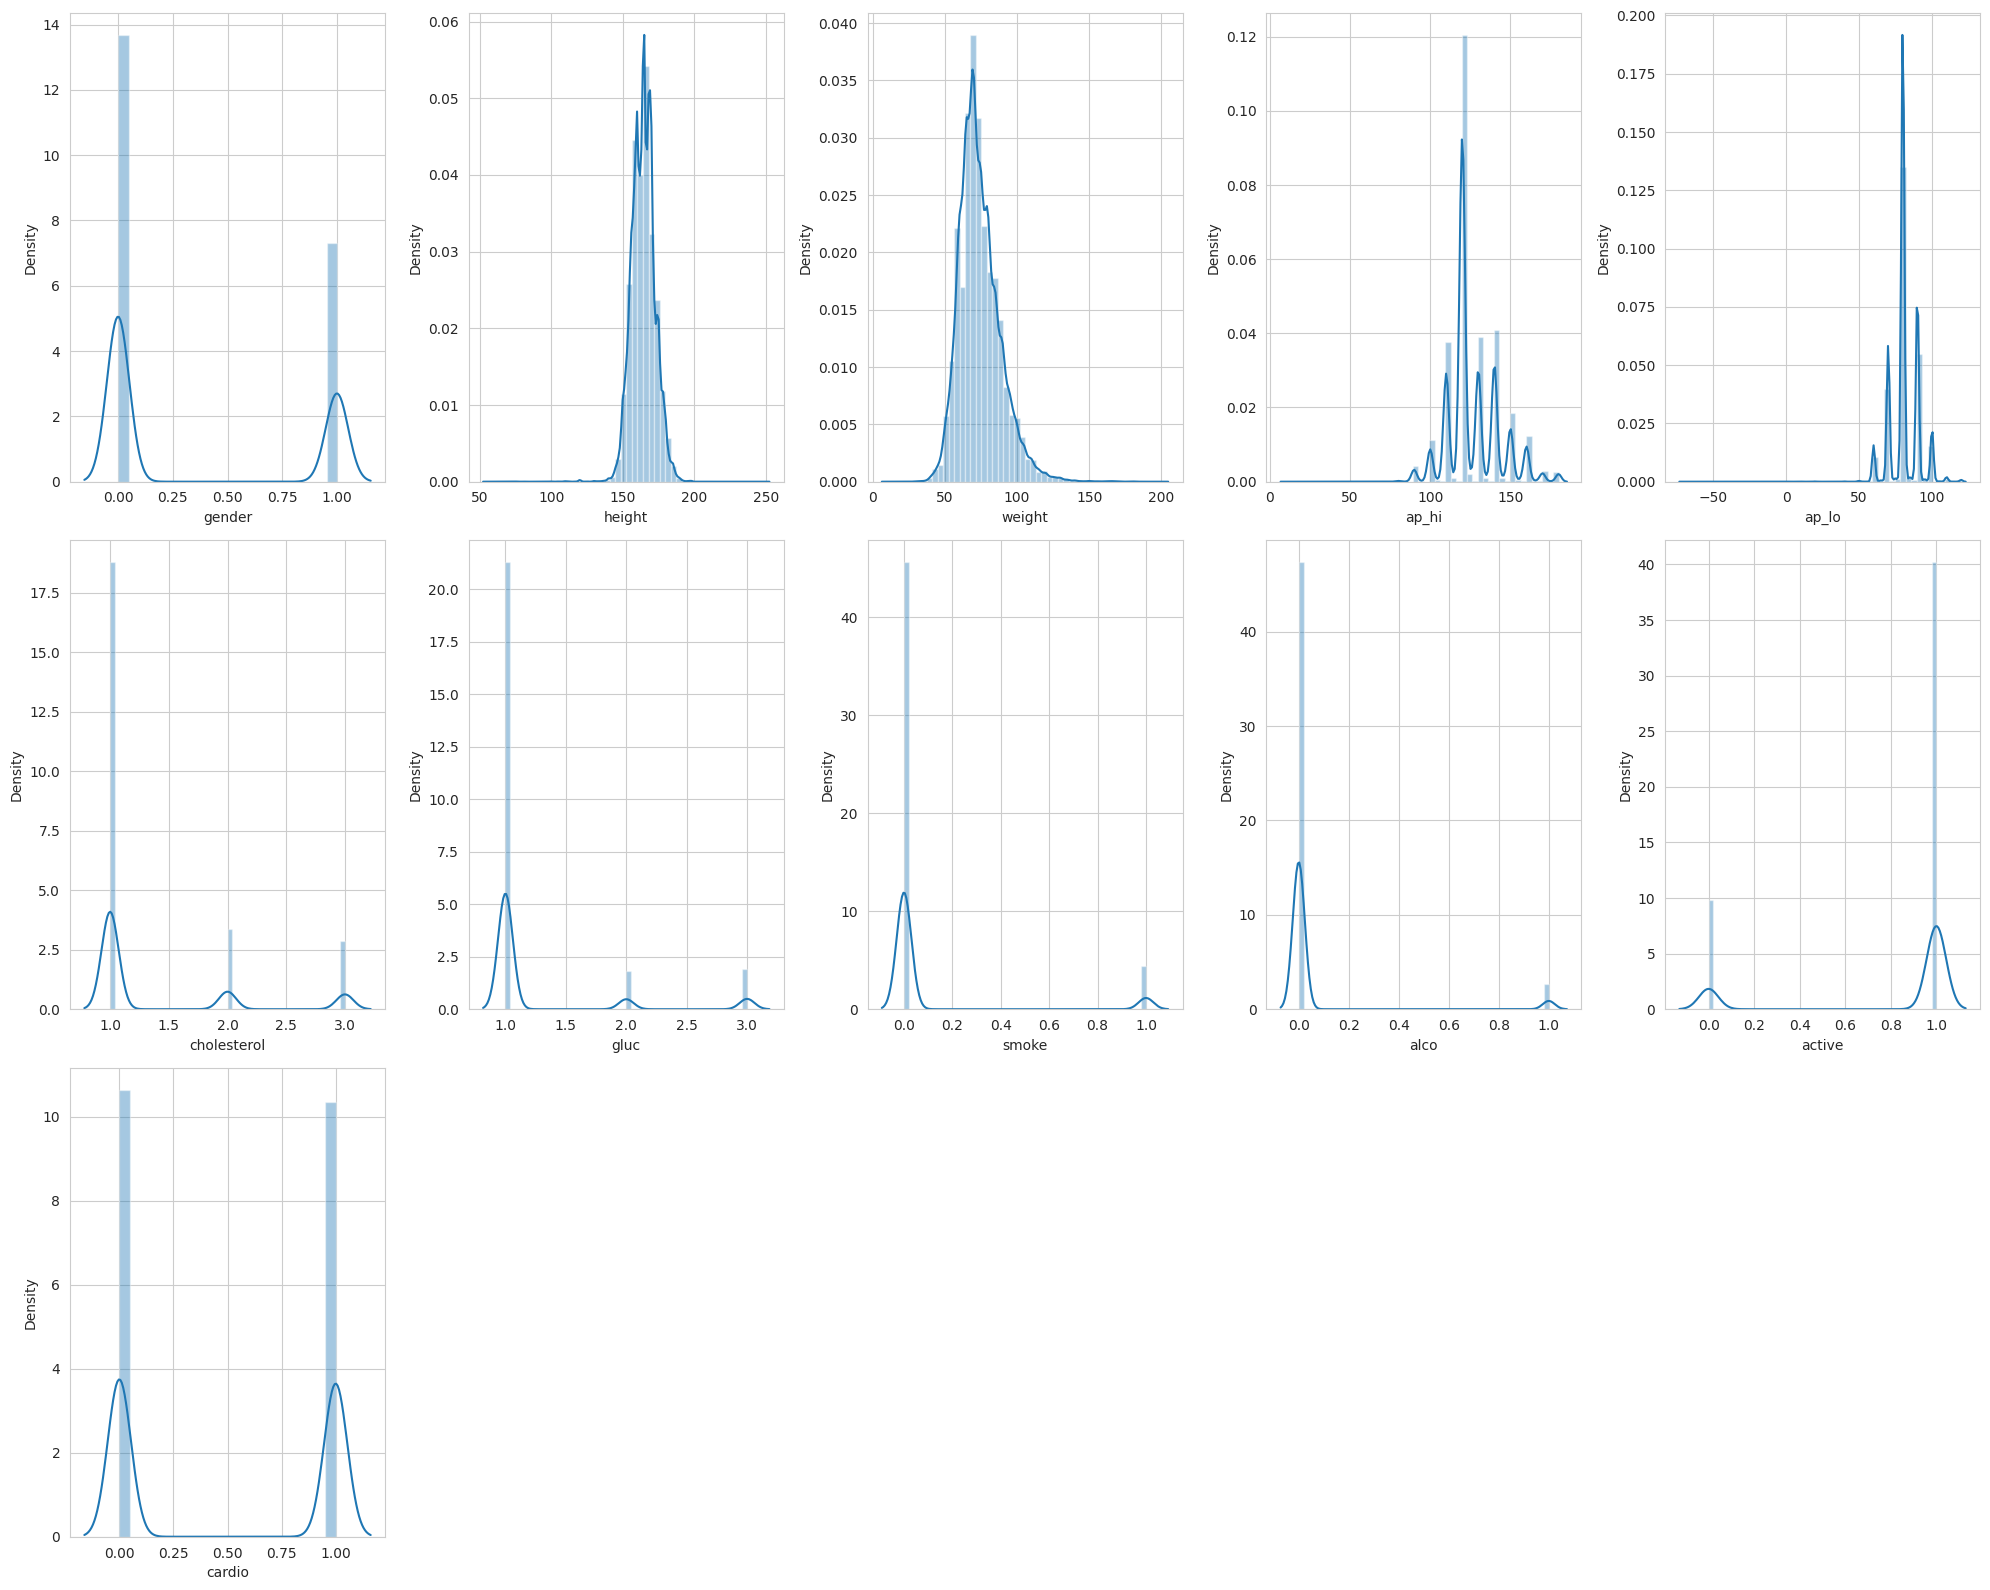

In [21]:
# checking  the skewness of ap_hi and ap_low
check_dist(df)


Converting age from days to years

In [22]:
df['age']=df['age'].apply(lambda x: x/365)

#calculating a new feature Pulse

In [23]:
#since there were not many variables showing cor-relation with cardio, we tried creating a new variable pulse
def pulse(data):
    return np.subtract(data['ap_hi'], data['ap_lo'])

df['pulse'] = df.apply(pulse, axis=1)

# Removing height, weight outliers

<Axes: >

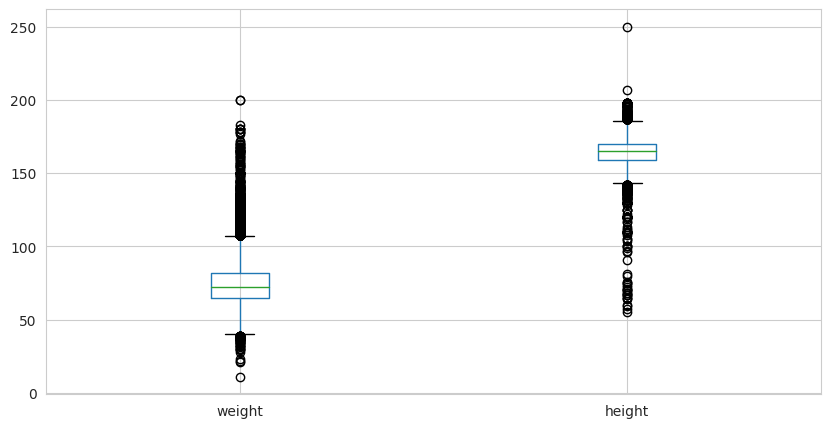

In [24]:
plt.figure(figsize=(10,5))
df.boxplot(['weight','height'])

Outliers = Q1 – 1.5 IQR

Outliers = Q3 + 1.5 IQR

IQR = Q3- Q1

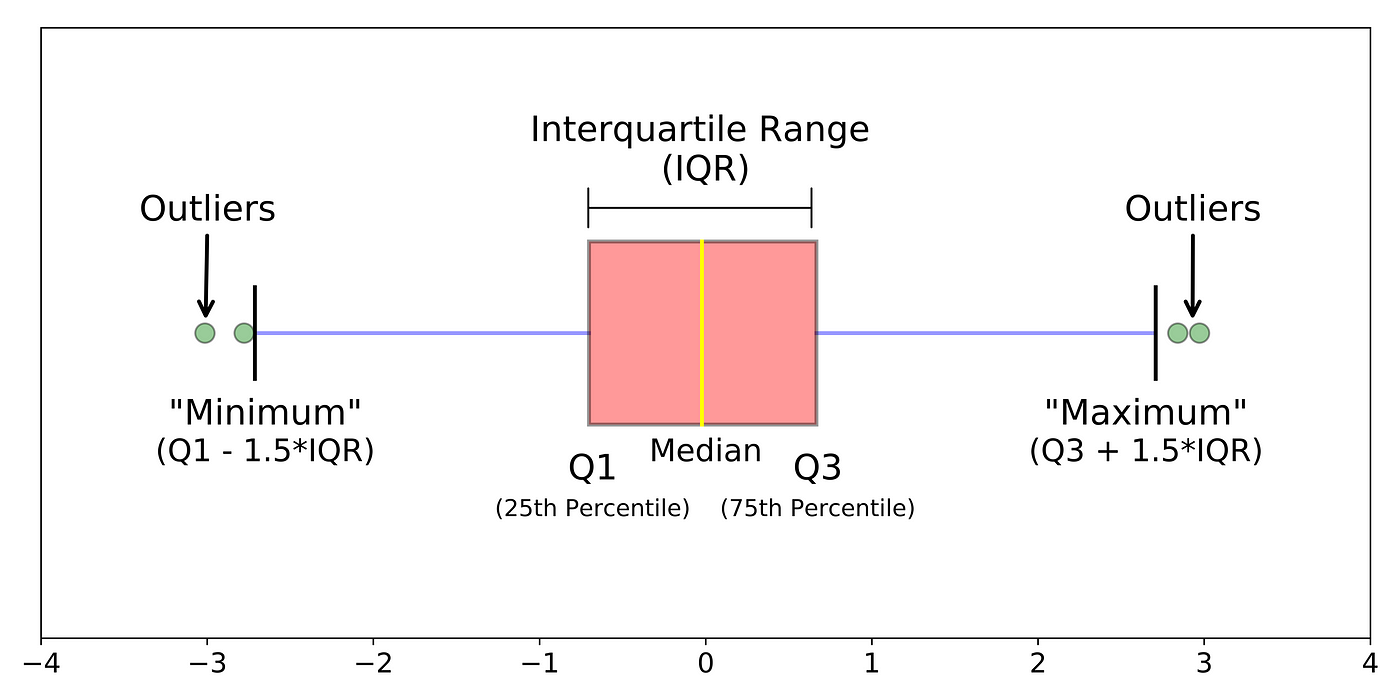

In [25]:
def outliers(df_cardio):
    for each_feature in df_cardio.columns:
        feature_data = df_cardio[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range

        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data>=Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight']])

For the feature height, No of Outliers is 505
For the feature weight, No of Outliers is 1714


Natural log of a value reduces the variation caused by extreme values.
Taking log will reduce the impact of outliers by compressing the data’s range and bringing extreme values closer to the mean

In [26]:
outlier_free_df = df.copy()
outlier_free_df[['height', 'weight']] = np.log(outlier_free_df[['height', 'weight']])
outliers(outlier_free_df[['height', 'weight']])

For the feature height, No of Outliers is 475
For the feature weight, No of Outliers is 1117


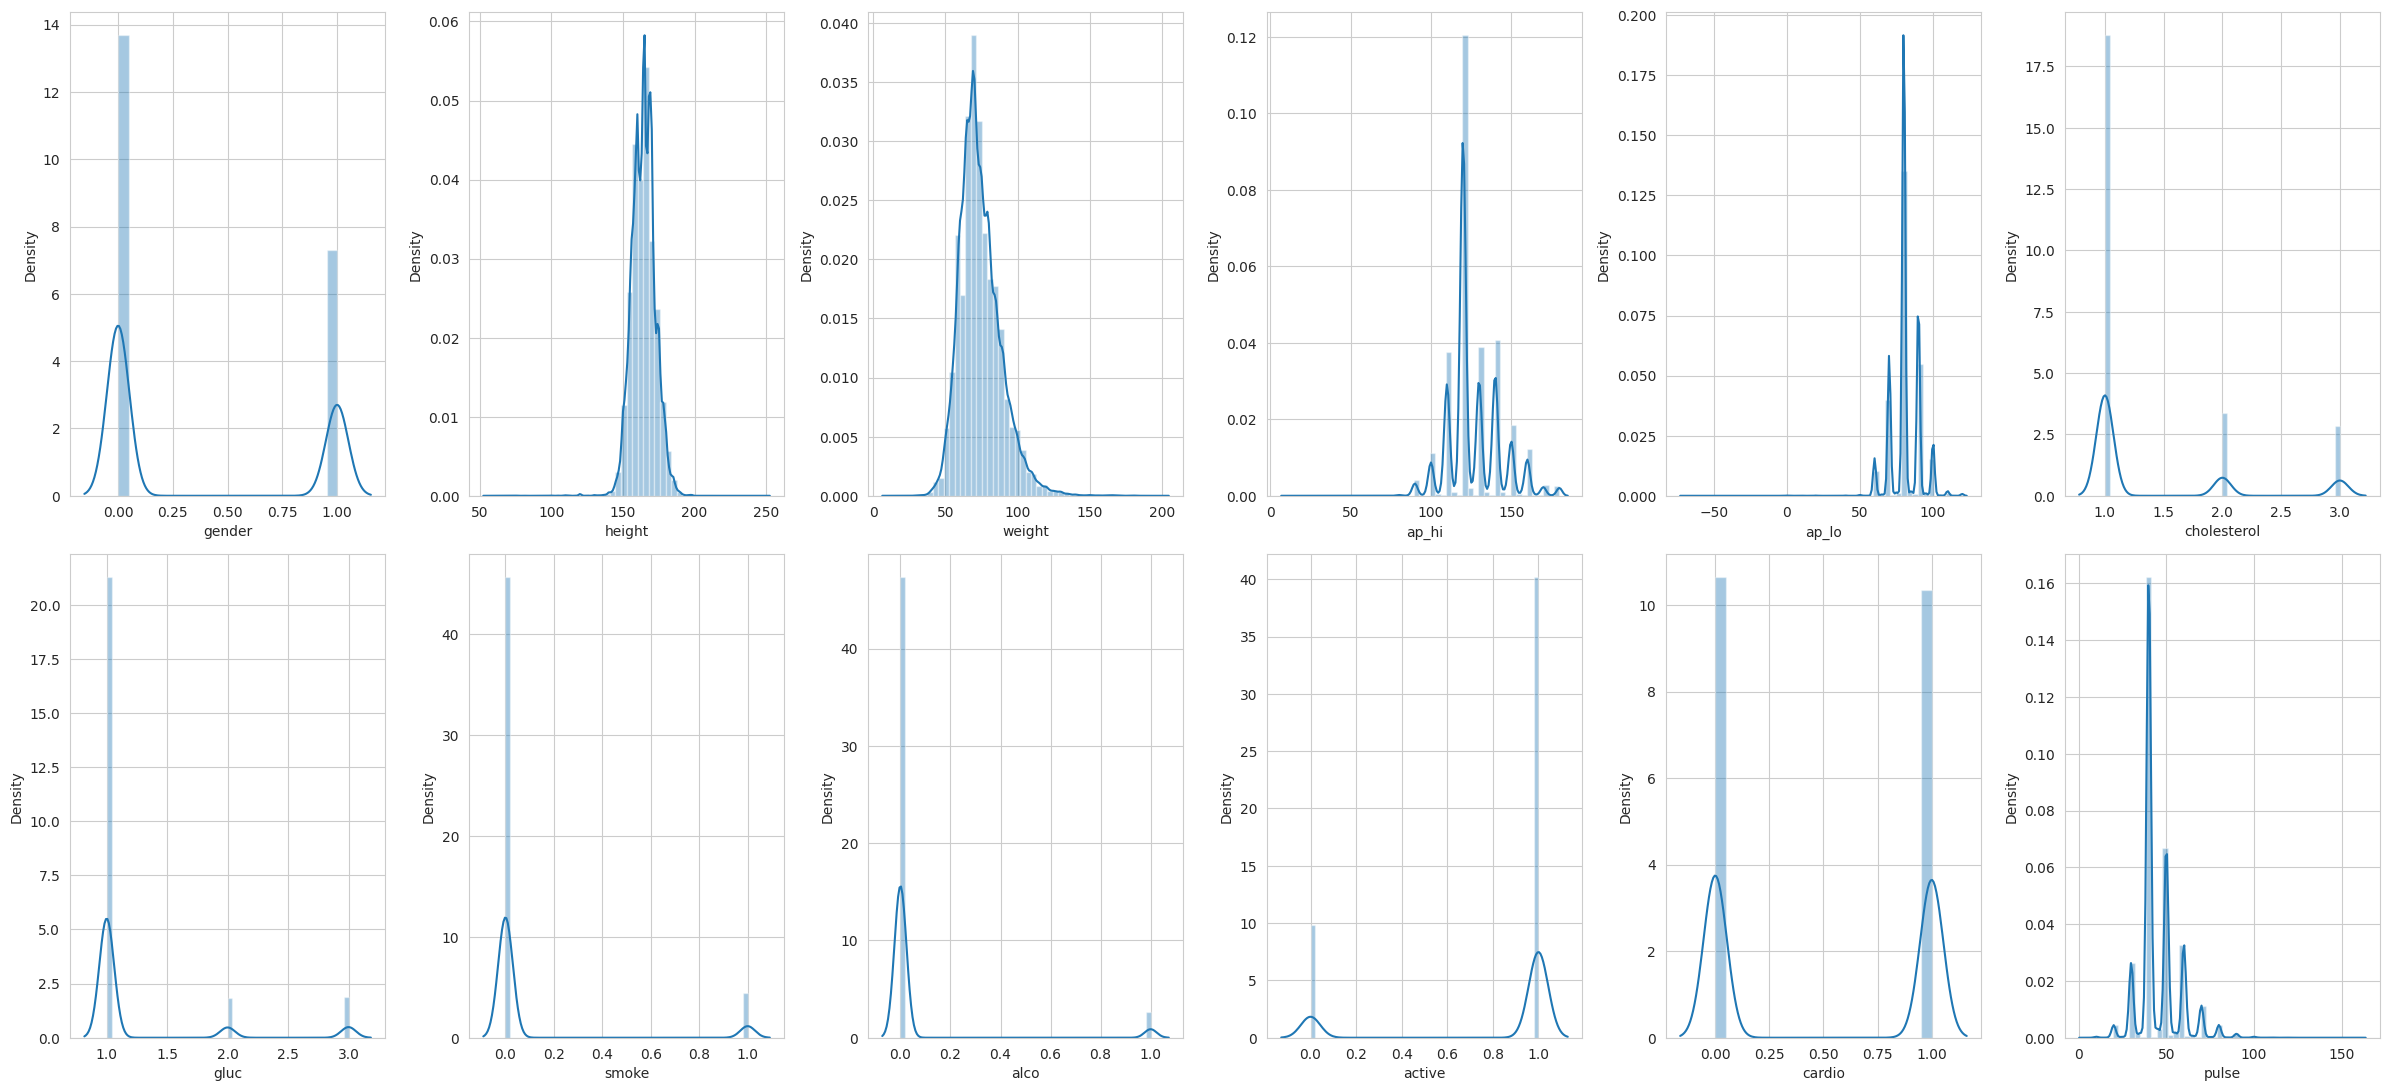

In [27]:
check_dist(df)

Here we can see that the skewness in ap_hi and ap_low is reduced considerably

Eliminating the data at the extreme tails of the distribution

In [28]:
outlier_free_df = outlier_free_df[(outlier_free_df['weight'] > outlier_free_df['weight'].quantile(0.005)) & (outlier_free_df['weight'] < outlier_free_df['weight'].quantile(0.995))]
outline_free_df = outlier_free_df[(outlier_free_df['height'] > outlier_free_df['height'].quantile(0.005)) & (outlier_free_df['height'] < outlier_free_df['height'].quantile(0.995))]
outliers(outline_free_df[['height', 'weight']])

For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 326


In [29]:
outlier_free_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse
0,50.391781,1,5.123964,4.127134,110,80,1,1,0,0,1,0,30.0
1,55.419178,0,5.049856,4.442651,140,90,3,1,0,0,1,1,50.0
2,51.663014,0,5.105945,4.158883,130,70,3,1,0,0,0,1,60.0
3,48.282192,1,5.129899,4.406719,150,100,1,1,0,0,1,1,50.0
4,47.873973,0,5.049856,4.025352,100,60,1,1,0,0,0,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57.736986,0,5.105945,4.382027,150,80,1,1,0,0,1,1,70.0
69995,52.712329,1,5.123964,4.330733,120,80,1,1,1,0,1,0,40.0
69997,52.235616,1,5.209486,4.653960,180,90,3,1,0,1,0,1,90.0
69998,61.454795,0,5.093750,4.276666,135,80,1,2,0,0,0,1,55.0


# Feature Selection using correlation matrix

<Axes: >

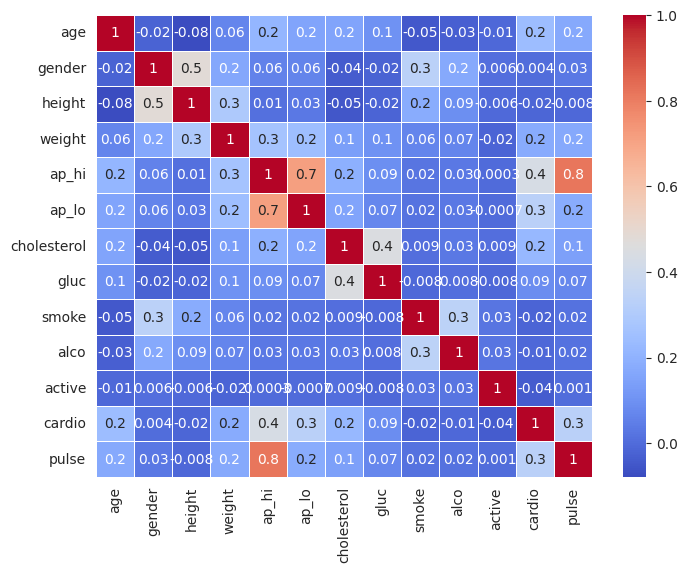

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(outlier_free_df.corr(), annot = True,cmap= 'coolwarm',ax=ax, fmt='.1g', linewidths=.5)

- ap_hi has the maximum correlation with Target Value which was initially 0.054

- ap_lo has a correlation 0.3 which was initially 0.066

- pulse and ap_lo also have some coorelation with cardio

- Features like gender, height, smoke, alco, active have quite low amount of correlation with target feature

Dropping less correlated values

In [31]:
outlier_free_df=outlier_free_df.drop(columns=['gender', 'height', 'smoke', 'alco', 'active'],axis=1)

In [32]:
outlier_free_df

,age,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,pulse
0,50.391781,4.127134,110,80,1,1,0,30.0
1,55.419178,4.442651,140,90,3,1,1,50.0
2,51.663014,4.158883,130,70,3,1,1,60.0
3,48.282192,4.406719,150,100,1,1,1,50.0
4,47.873973,4.025352,100,60,1,1,0,40.0
...,...,...,...,...,...,...,...,...
69994,57.736986,4.382027,150,80,1,1,1,70.0
69995,52.712329,4.330733,120,80,1,1,0,40.0
69997,52.235616,4.653960,180,90,3,1,1,90.0
69998,61.454795,4.276666,135,80,1,2,1,55.0


# converting categorical data to category data type

- gender has 2 categorial values as { 0 : Women, 1 : Male }
- cholesterol has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
- gluc has 3 categorial values as { 1: Normal, 2: Above Normal, 3: Well Above Normal }
- Remaining Categories are just binary values

In [33]:
categorical_columns=['cholesterol','gluc']
for col in categorical_columns:
  outlier_free_df[col] = outlier_free_df[col].astype('category')


df_cardio=pd.get_dummies(outlier_free_df)
#pd.get_dummies() creates new binary (0 or 1) columns corresponding to each unique category in that variable.
df_cardio

,age,weight,ap_hi,ap_lo,cardio,pulse,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,50.391781,4.127134,110,80,0,30.0,1,0,0,1,0,0
1,55.419178,4.442651,140,90,1,50.0,0,0,1,1,0,0
2,51.663014,4.158883,130,70,1,60.0,0,0,1,1,0,0
3,48.282192,4.406719,150,100,1,50.0,1,0,0,1,0,0
4,47.873973,4.025352,100,60,0,40.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,57.736986,4.382027,150,80,1,70.0,1,0,0,1,0,0
69995,52.712329,4.330733,120,80,0,40.0,1,0,0,1,0,0
69997,52.235616,4.653960,180,90,1,90.0,0,0,1,1,0,0
69998,61.454795,4.276666,135,80,1,55.0,1,0,0,0,1,0


# Scaling the Dataframe

There are some features having a lot of variations and are measured in different units

Scaling will help to transform the features of the dataset so that they have a similar scale

MinMax scaler is sensitive to outliers and sSince our dataset has had many ouliers, we chose standard scaler here because it is less sensitive to outliers

In [34]:
columns_to_scale=['age','weight','ap_hi','ap_lo']
scaler = StandardScaler()
df_cardio[columns_to_scale]= scaler.fit_transform(df_cardio[columns_to_scale])


In [35]:
df_cardio

,age,weight,ap_hi,ap_lo,cardio,pulse,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,-0.434391,-0.911625,-1.022706,-0.121631,0,30.0,1,0,0,1,0,0
1,0.309444,0.881396,0.852011,0.941501,1,50.0,0,0,1,1,0,0
2,-0.246304,-0.731203,0.227105,-1.184763,1,60.0,0,0,1,1,0,0
3,-0.746517,0.677201,1.476917,2.004632,1,50.0,1,0,0,1,0,0
4,-0.806916,-1.490036,-1.647612,-2.247894,0,40.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,0.652377,0.536878,1.476917,-0.121631,1,70.0,1,0,0,1,0,0
69995,-0.091051,0.245388,-0.397800,-0.121631,0,40.0,1,0,0,1,0,0
69997,-0.161584,2.082224,3.351635,0.941501,1,90.0,0,0,1,1,0,0
69998,1.202450,-0.061865,0.539558,-0.121631,1,55.0,1,0,0,0,1,0


In [36]:
#splitting the dataset
X = df_cardio.drop(['cardio'], axis =1)
Y = df_cardio['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#KNN

Choosing the best K value

In [37]:
knn_scores=[]
results = []
k_values = [i for i in range (1,21)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test)),

    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.636158
1    2  0.646607
2    3  0.679087
3    4  0.685100
4    5  0.695549
5    6  0.701661
6    7  0.705308
7    8  0.705998
8    9  0.711026
9   10  0.710385
10  11  0.713539
11  12  0.714969
12  13  0.718074
13  14  0.717532
14  15  0.719010
15  16  0.718961
16  17  0.720538
17  18  0.720440
18  19  0.721672
19  20  0.721425


Text(0, 0.5, 'Accuracy Score')

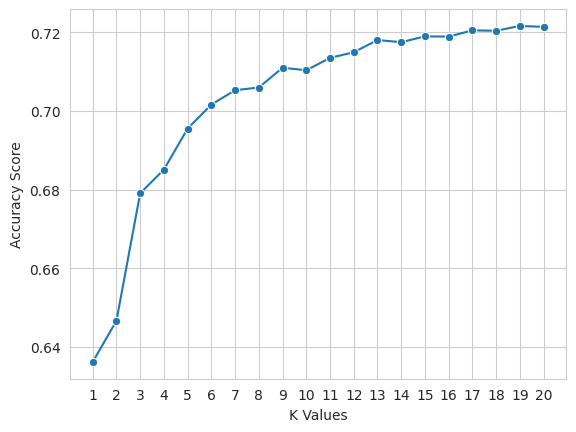

In [38]:
sns.lineplot(x = results['k'], y = results['accuracy'].to_list(), marker = 'o')
plt.xticks(k_values)
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Choosing k = 18 because it has the highest accuracy

In [39]:
knn1 = KNeighborsClassifier(n_neighbors=17).fit(X_train, y_train)

In [40]:
Y_pred = knn1.predict(X_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73     10221
           1       0.74      0.68      0.71     10068

    accuracy                           0.72     20289
   macro avg       0.72      0.72      0.72     20289
weighted avg       0.72      0.72      0.72     20289



In [41]:
#validation accuracy
classificationSummary(y_test,Y_pred)

Confusion Matrix (Accuracy 0.7205)

       Prediction
Actual    0    1
     0 7795 2426
     1 3244 6824


# Decision Tree

Choosing the max depth for a greater accuracy

In [42]:
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,10):
  classTree = DecisionTreeClassifier(max_depth=depth)
  classTree.fit(X_train, y_train)
  train_accuracy.append(classTree.score(X_train, y_train))
  validation_accuracy.append(classTree.score(X_test, y_test))

accuracy_df=pd.DataFrame({"max_depth": range(1,10),"train_acc": train_accuracy,"valid_acc": validation_accuracy})

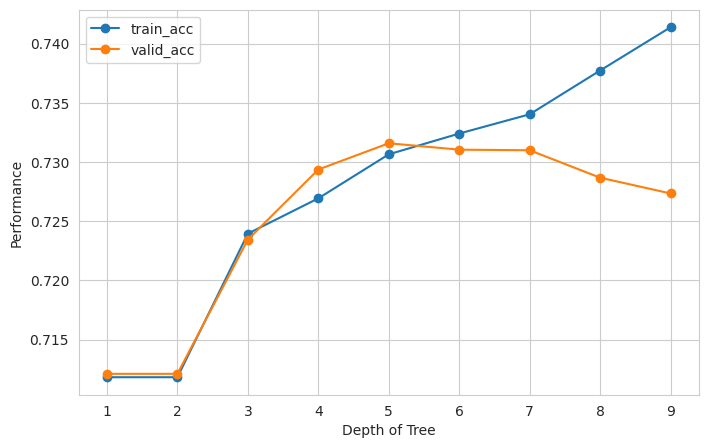

In [43]:
plt.figure(figsize=(8,5))
plt.plot(accuracy_df['max_depth'],accuracy_df['train_acc'],marker='o',label='train_acc')
plt.plot(accuracy_df['max_depth'],accuracy_df['valid_acc'],marker='o',label='valid_acc')
plt.xlabel("Depth of Tree")
plt.ylabel("Performance")
plt.legend(loc='upper left')

Observations
- When max depth=1, both training and validation accuracy was less and this will not allow the model to learn the pattern i.e underfitting

- Max depth of 5 is producing the highest validation accuracy

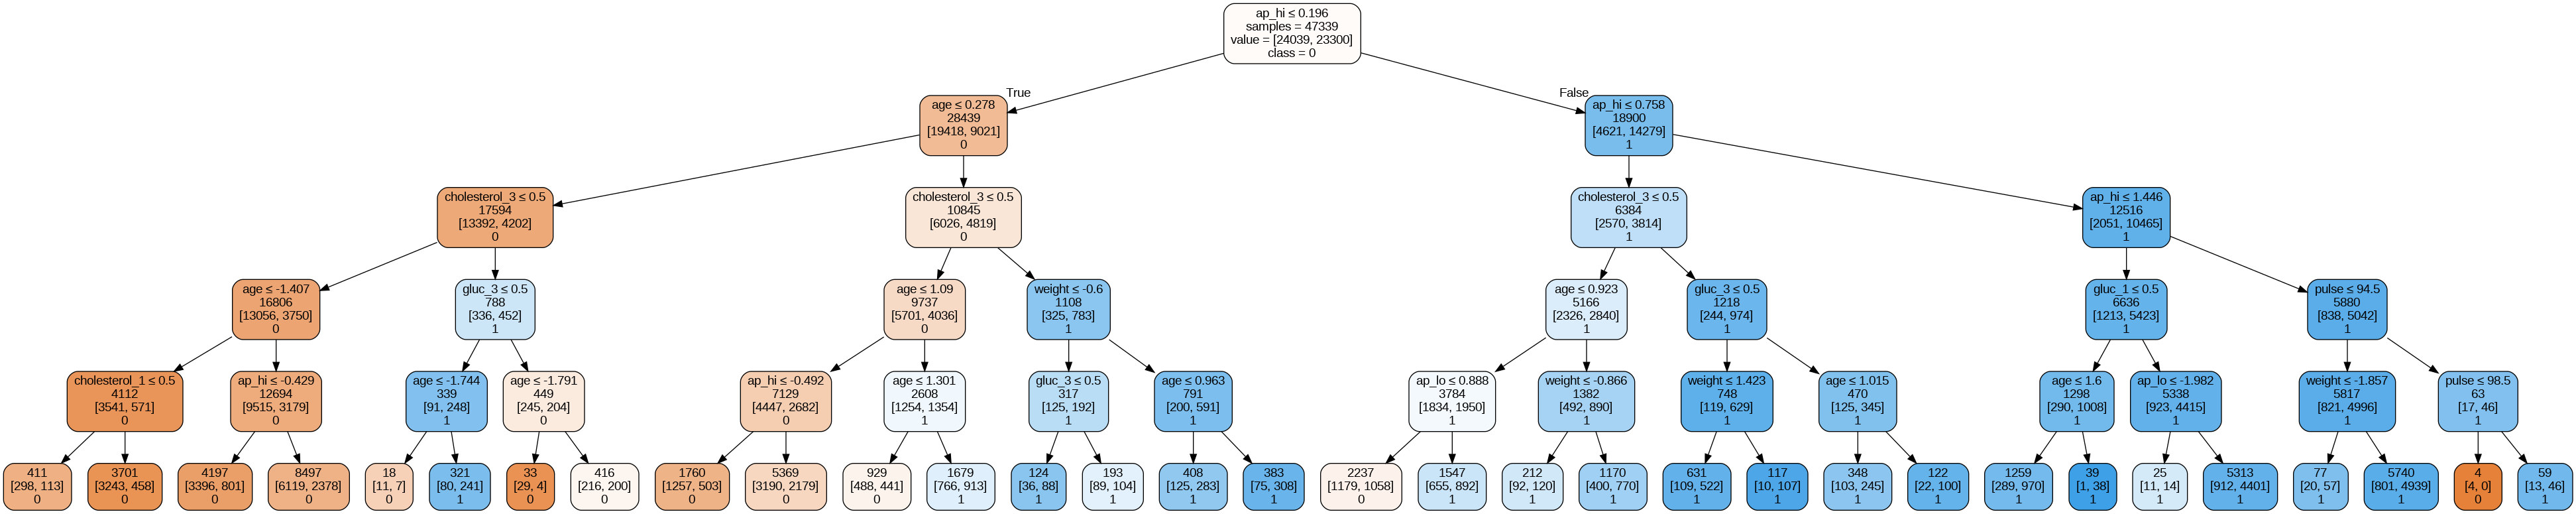

In [44]:
classTree = DecisionTreeClassifier(max_depth=5)
classTree.fit(X_train, y_train)
plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

In [45]:
Y_pred_dt = classTree.predict(X_test)

dtree_acc = accuracy_score(y_test, Y_pred_dt)   # accuracy score
cm_dtree = confusion_matrix(y_test, Y_pred_dt) # Confusion matrix

print("Accuracy",dtree_acc)

print(classification_report(y_test, Y_pred_dt))

classificationSummary(y_test,Y_pred_dt)

Accuracy 0.7315786879589926
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     10221
           1       0.77      0.65      0.71     10068

    accuracy                           0.73     20289
   macro avg       0.74      0.73      0.73     20289
weighted avg       0.74      0.73      0.73     20289

Confusion Matrix (Accuracy 0.7316)

       Prediction
Actual    0    1
     0 8254 1967
     1 3479 6589


In [46]:
# Five-fold cross-validation of the full decision tree classifier

scores = cross_val_score(classTree, X_train, y_train, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print("Mean Cross-Validation Score:", np.mean(scores))

Accuracy scores of each fold:  ['0.733', '0.730', '0.722', '0.723', '0.726']
Mean Cross-Validation Score: 0.7271382851306267


# Logistic regression

In [47]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred_lr)   # accuracy score
cm_lr = confusion_matrix(y_test, y_pred_lr) # Confusion matrix

print('Accuracy ', lr_acc )# accuracy score

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred_lr))

classificationSummary(y_test,y_pred_lr)

Accuracy  0.7255162896150623

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10221
           1       0.76      0.66      0.70     10068

    accuracy                           0.73     20289
   macro avg       0.73      0.73      0.72     20289
weighted avg       0.73      0.73      0.72     20289

Confusion Matrix (Accuracy 0.7255)

       Prediction
Actual    0    1
     0 8092 2129
     1 3440 6628


# Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define evaluation metric
scoring = 'accuracy'

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, y_train,)

# Print best hyperparameters and performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Best", scoring, ":", grid_search.best_score_)

In [ ]:
estimator_range = range(1, 500, 50)  # Adjust the range as needed

# Initialize an empty list to store mean cross-validation scores
cv_scores = []

# Loop through each value of n_estimators and perform cross-validation
for estimator in estimator_range:
    rf = RandomForestClassifier(n_estimators=estimator, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')  # Adjust scoring as needed
    cv_scores.append(scores.mean())

print(cv_scores)
# Find the optimal number of estimators with the highest cross-validation score

optimal_n_estimators = estimator_range[np.argmax(cv_scores)]
print("Optimal number of estimators:", optimal_n_estimators)

[0.6307275413685474, 0.6788060712441221, 0.6803903774608695, 0.6796933148563246, 0.6808129067198896, 0.6802214206474192, 0.6805805428493766, 0.6803904198557068, 0.6800946890916613, 0.6803270752752464]
Optimal number of estimators: 201


          feature  importance       std
9          gluc_2    0.003389  0.000923
10         gluc_3    0.003667  0.001056
6   cholesterol_2    0.004429  0.002420
8          gluc_1    0.004582  0.001253
5   cholesterol_1    0.012715  0.011507
7   cholesterol_3    0.016310  0.009833
3           ap_lo    0.058618  0.045101
4           pulse    0.061519  0.046912
2           ap_hi    0.130577  0.070988
1          weight    0.191020  0.012344
0             age    0.513174  0.012247


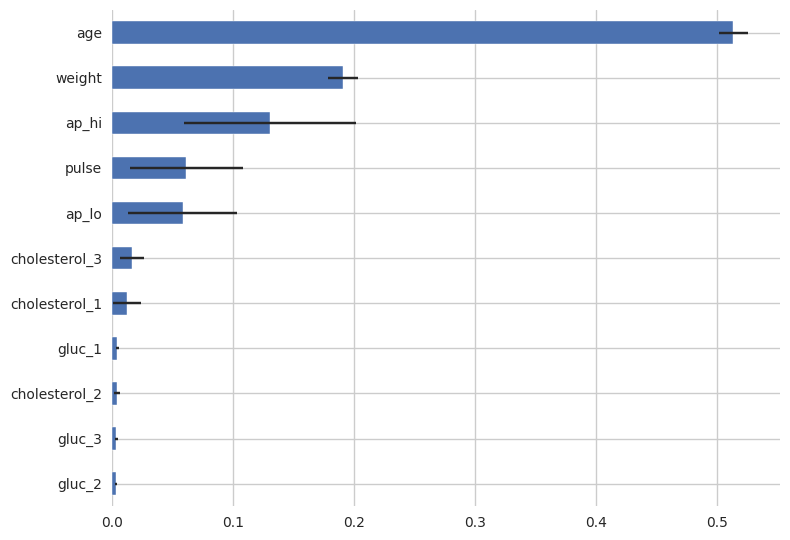

In [ ]:

rf = RandomForestClassifier(n_estimators=400, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()


In [ ]:

Y_pred_rf = rf.predict(X_test)

rf_tree_acc = accuracy_score(y_test, Y_pred_rf)   # accuracy score
cm_rf_tree = confusion_matrix(y_test, Y_pred_rf) # Confusion matrix

print("Accuracy",rf_tree_acc)

print(classification_report(y_test, Y_pred_rf))

classificationSummary(y_test,Y_pred_rf)

Accuracy 0.6759820592439253
              precision    recall  f1-score   support

           0       0.68      0.68      0.68     10221
           1       0.67      0.68      0.67     10068

    accuracy                           0.68     20289
   macro avg       0.68      0.68      0.68     20289
weighted avg       0.68      0.68      0.68     20289

Confusion Matrix (Accuracy 0.6760)

       Prediction
Actual    0    1
     0 6905 3316
     1 3258 6810


# Model Evaluation

Th recall of all the models lie between 67-79 %

Therfore we are trying to evlaluate the model using AUC and ROC curve

Its the ability of the model to seperate positive classes from negative classes

In [ ]:
pred_prob_knn= knn1.predict_proba(X_test)
pred_prob_dt = classTree.predict_proba(X_test)
pred_prob_logreg= logreg.predict_proba(X_test)
pred_prob_rf = rf.predict_proba(X_test)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_knn[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob_logreg[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob_rf[:,1])

print(auc_score1, auc_score2,auc_score3,auc_score4)

0.7806324244914447 0.792719112811475 0.790117699593843 0.7386667442527687


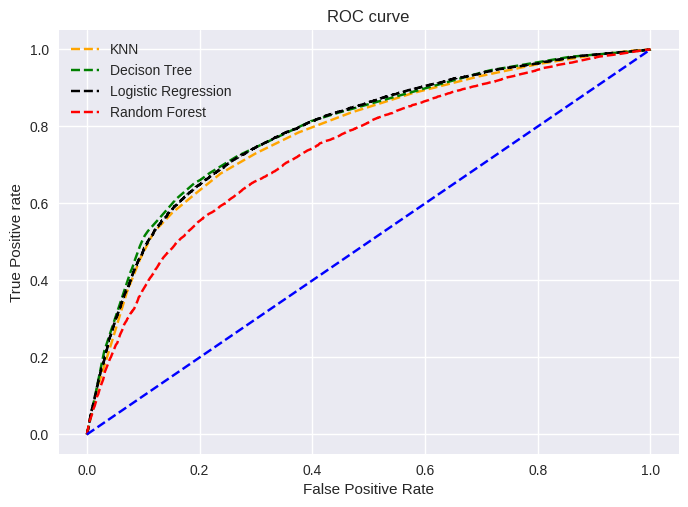

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_logreg[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decison Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()


# Conclusion

Although Random forest has the highest recall, it does not have good accuracy in terms of classification

It is evident from the plot that the AUC for the Logistic Regression and  Decision Tree ROC  curve is higher than that for the KNN , Random Forest and ROC curve.

Therefore, we can say that logistic regression has greaer recall so logistic did a better job of classifying the positive class in the dataset.

